# Clustering

In unsupervised we find a pattern in data while in supervised we find a pattern in data for prediction

In [72]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import  KMeans
import pandas as pd
import numpy as np

In [68]:
raw_data = datasets.load_iris()
species = raw_data.feature_names[:3]
raw_data = raw_data.data[:,:2]
X = StandardScaler().fit_transform(raw_data)
X_train , X_test = train_test_split(X,test_size=.3)

In [73]:
# Import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(X_train)

# Determine the cluster labels of new_points: labels
labels = model.predict(X_test)

# Print cluster labels of new_points
print(labels)


[0 2 0 2 2 2 0 0 2 0 0 2 2 2 0 0 1 1 2 1 2 0 2 0 0 0 2 2 2 2 2 0 0 2 2 0 0
 1 1 0 2 2 2 2 2]


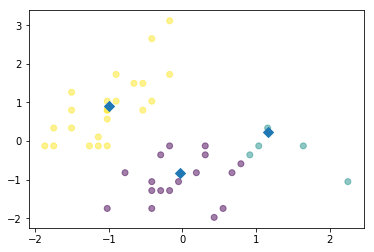

In [74]:
# Import pyplot

# Assign the columns of new_points: xs and ys
xs = X_test[:,0]
ys = X_test[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels,alpha=.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()



In [84]:
df = pd.DataFrame({'labels':labels,'species':species})
pd.crosstab(df['labels'],df['species'])

ValueError: arrays must all be same length

In [ ]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [ ]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)


In [ ]:
 # Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)


In [ ]:
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels,"species":species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['species'])

# Display ct
print(ct)


In [ ]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)


In [ ]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))


# Hierarchical Visualization 

1. divide observations into seperate clusters
2. at each step two closest steps are merged
3. continue until all observations into a single cluster
4. This is "Agglomerative" hierarchical clustering

## dendrogram of a hierarchical clustering
1. read from the bottom up
2. vertical lines represent clusters


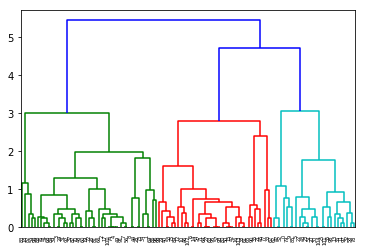

In [94]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(X_train,method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
          leaf_rotation=90,
           leaf_font_size=5,
)
plt.show()

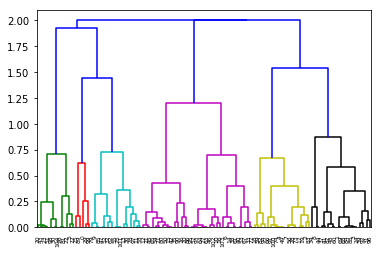

In [96]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(X_train)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements,method='complete')

# Plot the dendrogram
dendrogram(mergings,leaf_rotation=90,leaf_font_size=6)
plt.show()


# Different linkage, different hierarchical clustering!

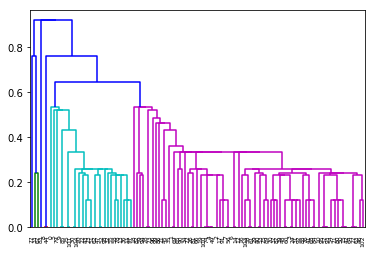

In [99]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(X_train,method='single')

# Plot the dendrogram
dendrogram(mergings,leaf_rotation=90,leaf_font_size=6)
plt.show()


In [110]:
import pandas as pd
from scipy.cluster.hierarchy import fcluster


mergings = linkage(X_train,method='single')
# Use fcluster to extract labels: labels
labels = fcluster(mergings,6,criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': np.arange(len(labels))})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)

varieties  0    1    2    3    4    5    6    7    8    9   ...   95   96   \
labels                                                      ...              
1            1    1    1    1    1    1    1    1    1    1 ...     1    1   

varieties  97   98   99   100  101  102  103  104  
labels                                             
1            1    1    1    1    1    1    1    1  

[1 rows x 105 columns]


# t-SNE(t-distributed stochastic neighbor embedding) for 2-dimensional maps


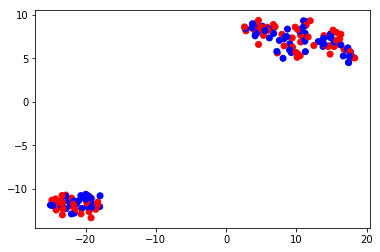

In [176]:
# Import TSNE
from sklearn.manifold import TSNE

samples = datasets.load_iris().data
# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples )

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c = ['r','b'])
plt.show()


In [ ]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys,alpha=.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()
